`pip install keras --upgrade tensorflow --upgrade`

1. Data load:

In [13]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

2. Hyperparameters setting:

In [14]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

3. Train and Test Data load:

In [15]:
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

4. Sequences Preprocessing:

In [16]:
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

5. Simple RNN model build:

In [17]:
# Створення порожньої моделі Sequential
model = Sequential()

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model.add(Embedding(max_features, 32))

# Додавання SimpleRNN шару з 32 вузлами
# Параметр: кількість вузлів (розмір прихованого стану)
model.add(SimpleRNN(32))

# Додавання Dense шару з одним вузлом та активацією sigmoid
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)
model.add(Dense(1, activation="sigmoid"))

6. Model compiling:

In [18]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

7. Model fitting:

In [19]:
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 
# та розбиттям на тренувальну та валідаційну підмножини
history = model.fit(input_train, y_train, epochs=4, batch_size=128, validation_split=0.3) # epochs = 5

Epoch 1/4
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - acc: 0.5465 - loss: 0.6807 - val_acc: 0.5447 - val_loss: 0.7027
Epoch 2/4
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - acc: 0.7575 - loss: 0.5092 - val_acc: 0.8256 - val_loss: 0.4114
Epoch 3/4
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - acc: 0.8508 - loss: 0.3581 - val_acc: 0.8291 - val_loss: 0.4005
Epoch 4/4
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - acc: 0.8827 - loss: 0.2910 - val_acc: 0.8421 - val_loss: 0.3822


8. Visualize results:

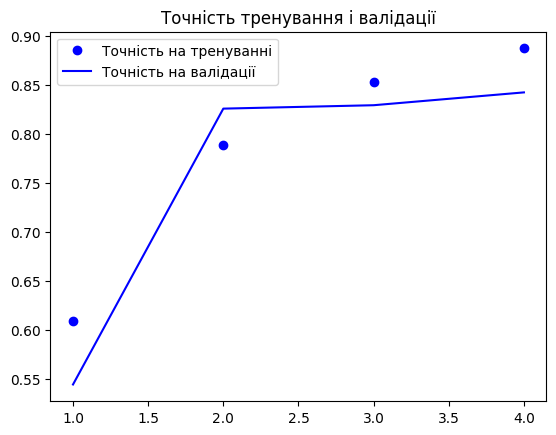

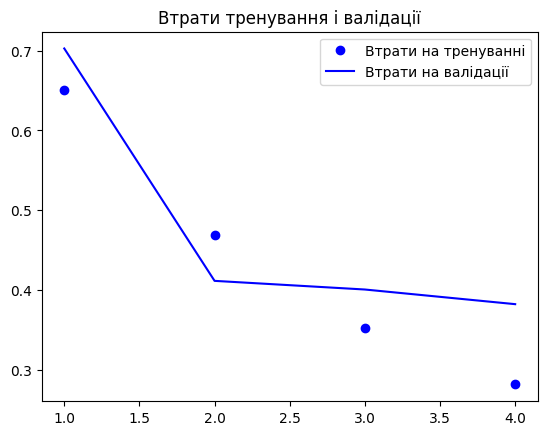

In [20]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Точність на тренуванні")  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, "b", label="Точність на валідації")  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, "bo", label="Втрати на тренуванні")  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, "b", label="Втрати на валідації")  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

9. Predictions using the fitted model:

In [21]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8412 - loss: 0.3775
Test Loss: 0.3751545250415802
Test Accuracy: 0.8432000279426575
